### Maximun Amount of Gold

In [ ]:
# Uses python3
import sys

def optimal_weight(W, w):
    # write your code here
    value = [[0]*(len(w)+1) for _ in range(W+1)]
    for i in range(1,len(w)+1):
        for j in range(1,W+1):
            value[j][i] = value[j][i-1]
            if w[i-1] <= j:
                val = value[j-w[i-1]][i-1] + w[i-1]
                if val >= value[j][i]:
                    value[j][i] = val
    return value[W][len(w)]       

if __name__ == '__main__':
    input = sys.stdin.read()
    W, n, *w = list(map(int, input.split()))
    print(optimal_weight(W, w))


### Maximum Value of an Arithmetic Expression

In [ ]:
# Uses python3
import sys
import math

def calc(a, b, op):
    if op == '+':
        return a + b
    elif op == '-':
        return a - b
    elif op == '*':
        return a * b
    else:
        assert False

def MinAndMax(M, m, i, j, operators):

    min_value = math.inf
    max_value = -math.inf
    for k in range(i, j):
        a = calc(M[i][k], M[k+1][j], operators[k])
        b = calc(M[i][k], m[k+1][j], operators[k])
        c = calc(m[i][k], M[k+1][j], operators[k])
        d = calc(m[i][k], m[k+1][j], operators[k])
        min_value = min(min_value, a, b, c, d)
        max_value = max(max_value, a, b, c, d)
    return min_value, max_value


def get_maximum_value(operands,operators):
    n = len(operands)
    m = [[None for x in range(n)] for x in range(n)]
    M = [[None for x in range(n)] for x in range(n)]

    for i in range(n):
        m[i][i] = operands[i]
        M[i][i] = operands[i]

    for s in range(1, n):
        for i in range(0, n-s):
            j = i + s
            m[i][j], M[i][j] = MinAndMax(M, m, i, j, operators)

    return M[0][n-1]



if __name__ == "__main__":
    expression = input()
    operators, operands = [], []

    for i in expression:
        if i in ['+', '-', '*']:
            operators.append(i)
        else:
            operands.append(int(i))

    print(get_maximum_value(operands, operators))


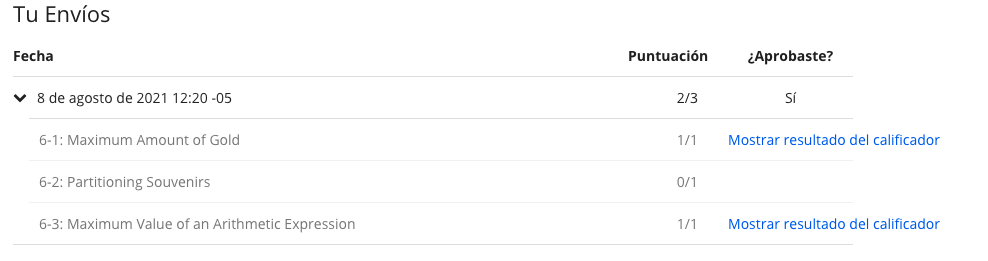